<a href="https://colab.research.google.com/github/lupis30puc/bipm_text_analytics_exercises/blob/main/exercise_8_mining_social_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercise 8. Mining Social Graphs**

In this exercise, we will conduct network analytics on a 2018 State of the Union Retweet dataset, which can be found here. We will analyse the relationship between the users both visually and using network metrics. We will follow the steps:

1. Import the following packages:


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from google.colab import files

2. Download the dataset (if not already done) and import it in python as a data frame called sotu_retweets.

In [ ]:
uploaded = files.upload() 

Saving sotu2018-rt.csv to sotu2018-rt.csv


In [ ]:
sotu_retweets = pd.read_csv('sotu2018-rt.csv')
sotu_retweets.head()

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status-extended_tweet-full_text,quoted_status-text,quoted_status-user-screen_name,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
0,NaN,NaN,Wed Jan 31 03:51:59 +0000 2018,NaN,0,False,low,NaN,958548390052179968,958548390052179968,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,A PERFECT ANALOGY:\n\nSeveral democrats are br...,A PERFECT ANALOGY:\n\nSeveral democrats are br...,ScottPresler,"<a href=""http://twitter.com/download/iphone"" r...",RT @ScottPresler: A PERFECT ANALOGY:\n\nSevera...,1517370719813,False,MatthewJAld,NaN
1,NaN,NaN,Wed Jan 31 03:55:33 +0000 2018,NaN,0,False,low,NaN,958549287285215232,958549287285215232,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,President Trump invited families of Americans ...,RealJack,"<a href=""http://twitter.com/download/android"" ...",RT @RealJack: President Trump invited families...,1517370933730,False,broussard_sr,NaN
2,NaN,NaN,Wed Jan 31 03:09:22 +0000 2018,NaN,0,False,low,NaN,958537665334296577,958537665334296577,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,Don't you be fooled by any of his White Suprem...,UNITEDWEDREAM,"<a href=""http://twitter.com/download/iphone"" r...",RT @UNITEDWEDREAM: Don't you be fooled by any ...,1517368162841,False,CLSTEPHANY,NaN
3,NaN,NaN,Wed Jan 31 02:36:19 +0000 2018,NaN,0,False,low,NaN,958529347828305921,958529347828305921,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,NaN,Uh-oh. Our president mentioned the FIRST and S...,TomiLahren,"<a href=""http://twitter.com/download/iphone"" r...",RT @TomiLahren: Uh-oh. Our president mentioned...,1517366179793,False,DAWNSTUTESMAN,NaN
4,NaN,NaN,Wed Jan 31 02:46:24 +0000 2018,NaN,0,False,low,NaN,958531885424173057,958531885424173057,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,"Tonight isn't about memos, fake news, free thi...","Tonight isn't about memos, fake news, free thi...",TomiLahren,"<a href=""http://twitter.com/download/android"" ...","RT @TomiLahren: Tonight isn't about memos, fak...",1517366784803,False,SCischk,NaN


In [ ]:
sotu_retweets.info

<bound method DataFrame.info of       contributors  coordinates  ... user-screen_name withheld_in_countries
0              NaN          NaN  ...      MatthewJAld                   NaN
1              NaN          NaN  ...     broussard_sr                   NaN
2              NaN          NaN  ...       CLSTEPHANY                   NaN
3              NaN          NaN  ...    DAWNSTUTESMAN                   NaN
4              NaN          NaN  ...          SCischk                   NaN
...            ...          ...  ...              ...                   ...
2335           NaN          NaN  ...    _weebutmighty                   NaN
2336           NaN          NaN  ...  johnny0nthesp0t                   NaN
2337           NaN          NaN  ...     joblackwood3                   NaN
2338           NaN          NaN  ...     LindaGarriss                   NaN
2339           NaN          NaN  ...      JesseMartel                   NaN

[2340 rows x 37 columns]>

In [ ]:
x = sotu_retweets['user-screen_name'].str.contains('FoxNews')
print(sotu_retweets[x])

      contributors  coordinates  ... user-screen_name withheld_in_countries
2144           NaN          NaN  ...          FoxNews                   NaN

[1 rows x 37 columns]


3. Restrict the data frame to rows where either 'user-screen_name' or 'retweeted_status-user-screen_name' equals to ‘FoxNews’ and call it sotu_retweets_Fox. What do the two names stand for?

In [ ]:
sotu_retweets_Fox = sotu_retweets[sotu_retweets['retweeted_status-user-screen_name'].str.contains('FoxNews') | sotu_retweets['user-screen_name'].str.contains('FoxNews')]

sotu_retweets_Fox.head()

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status-extended_tweet-full_text,quoted_status-text,quoted_status-user-screen_name,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
52,NaN,NaN,Wed Jan 31 03:14:11 +0000 2018,NaN,0,False,low,NaN,958538876695523328,958538876695523328,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""Terrorists who do things like place ...",".@POTUS: ""Terrorists who do things like place ...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""Terrorists who do thing...",1517368451652,False,coachfoster15,NaN
55,NaN,NaN,Wed Jan 31 02:52:54 +0000 2018,NaN,0,False,low,NaN,958533520988753923,958533520988753923,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""For decades, open borders have allow...",".@POTUS: ""For decades, open borders have allow...",FoxNews,"<a href=""http://twitter.com/#!/download/ipad"" ...","RT @FoxNews: .@POTUS: ""For decades, open borde...",1517367174752,False,VoseJim,NaN
58,NaN,NaN,Wed Jan 31 03:06:20 +0000 2018,NaN,0,False,low,NaN,958536901211967489,958536901211967489,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""We celebrate our police, our militar...",".@POTUS: ""We celebrate our police, our militar...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We celebrate our police...",1517367980660,False,slewis8353,NaN
73,NaN,NaN,Wed Jan 31 03:16:53 +0000 2018,NaN,0,False,low,NaN,958539556155994112,958539556155994112,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,.@POTUS: “Let’s begin tonight by recognizing t...,.@POTUS: “Let’s begin tonight by recognizing t...,FoxNews,"<a href=""http://twitter.com/download/android"" ...",RT @FoxNews: .@POTUS: “Let’s begin tonight by ...,1517368613648,False,TravarL,NaN
84,NaN,NaN,Wed Jan 31 03:36:51 +0000 2018,NaN,0,False,low,NaN,958544581058064384,958544581058064384,NaN,NaN,NaN,NaN,NaN,False,en,NaN,False,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""We repealed the core of disastrous #...",".@POTUS: ""We repealed the core of disastrous #...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""We repealed the core of...",1517369811678,False,kujayhawksone66,NaN


In [ ]:
sotu_retweets_Fox.info

<bound method DataFrame.info of       contributors  coordinates  ... user-screen_name withheld_in_countries
52             NaN          NaN  ...    coachfoster15                   NaN
55             NaN          NaN  ...          VoseJim                   NaN
58             NaN          NaN  ...       slewis8353                   NaN
73             NaN          NaN  ...          TravarL                   NaN
84             NaN          NaN  ...  kujayhawksone66                   NaN
...            ...          ...  ...              ...                   ...
2150           NaN          NaN  ...  TimTheTruckerCA                   NaN
2210           NaN          NaN  ...          ggary59                   NaN
2218           NaN          NaN  ...       Chelseax05                   NaN
2237           NaN          NaN  ...     rob_radams20                   NaN
2328           NaN          NaN  ...        jdris8888                   NaN

[129 rows x 37 columns]>

4. How many times was FoxNews retweeted and how many times did they retweet some other user?

In [ ]:
sotu_retweets_Fox.columns

Index(['contributors', 'coordinates', 'created_at', 'extended_entities',
       'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count',
       'quoted_status-extended_tweet-full_text', 'quoted_status-text',
       'quoted_status-user-screen_name', 'quoted_status_id',
       'quoted_status_id_str', 'reply_count', 'retweet_count', 'retweeted',
       'retweeted_status-extended_tweet-full_text', 'retweeted_status-text',
       'retweeted_status-user-screen_name', 'source', 'text', 'timestamp_ms',
       'truncated', 'user-screen_name', 'withheld_in_countries'],
      dtype='object')

In [ ]:
print('Fox News was retweeted:')
sotu_retweets_Fox['retweeted_status-user-screen_name'].str.contains('FoxNews').value_counts()

Fox News was retweeted:


True     128
False      1
Name: retweeted_status-user-screen_name, dtype: int64

In [ ]:
print('Fox News tweeting:')
sotu_retweets_Fox['user-screen_name'].str.contains('FoxNews').value_counts()

Fox News tweeting:


False    128
True       1
Name: user-screen_name, dtype: int64

## Part A. Network creation

5. Run the following code. What is it doing? What kind of analysis can it be used for?
 G_rt = nx.from_pandas_edgelist(sotu_retweets_Fox, source = 'retweeted_status-user-screen_name', target = ‘user-screen_name', create_using = nx.DiGraph())

In [ ]:
G_rt = nx.from_pandas_edgelist(sotu_retweets_Fox, source = 'retweeted_status-user-screen_name', target = 'user-screen_name', create_using = nx.DiGraph())

6. Print the number of nodes and the number of edges in G_rt based on 4. How were those numbers calculated?

In [ ]:
print(len(G_rt.nodes()))

130


In [ ]:
print(len(G_rt.edges()))

129


In [ ]:
print(G_rt.nodes())

['FoxNews', 'coachfoster15', 'VoseJim', 'slewis8353', 'TravarL', 'kujayhawksone66', 'EblingJr', 'LaurelT1', 'SherryWhy1', 'JeSuisDog', 'LorriStringer', 'TomReed72363098', 'bobbypick', 'Texas_Trump', 'dnjma5', 'ChrisFi19702048', '2Run26', 'Lynnmorrisdown1', 'sjlev_lvgd', 'astepp37', 'jackson5213', 'GetOnTRUMPTrain', 'DeJonXIII', 'Deplorablesss', 'resterkat57', 'aburgher', 'AdvertisingLaw', 'RicoColon1', 'Karen_Becker_Go', 'SASHATAZLEA', 'stillcricket', 'Pperezz21', 'TheGhostImpala', 'lisastewart59', 'Heart4Missions', 'WEdwarda', '1Hammer', 'paphotog', 'CDFREEIII', 'jeanbadgett63', 'ProChoiceKills', 'mariadestrella', 'collm57', 'laurabennawy', 'caligurll17', 'Everloves', 'sujinhammond', 'dotpark', 'BenjiminJune1', 'travlyngirl', 'FrankieRusso1', 'trumps_feed', 'MayhewNichoel', 'brookiesamommy', 'Katjam7025', 'TinaColaco', 'Bmoreravenscm', 'SSteamroller', 'GramaD386', 'sueieque52', 'yray1', 'alres9', 'lyndamurphy1055', 'AdamBEvans', 'ENEMIESOVER', 'JuddPDeere', 'robertthedeuce', 'yamatore

In [ ]:
#target is the person who retweeted, source is who was retweeted.

*What does it means based on 4?*

## Part B. Network visualisation

7. What is the degree of the node ‘FoxNews’ and what does it stand for?

In [ ]:
print(G_rt.in_degree('FoxNews')) #when you retweet

1


In [ ]:
print(G_rt.out_degree('FoxNews')) #when you are being retweeted

128


8. Run the following code. What is it doing? Does it match with the result from 4.?

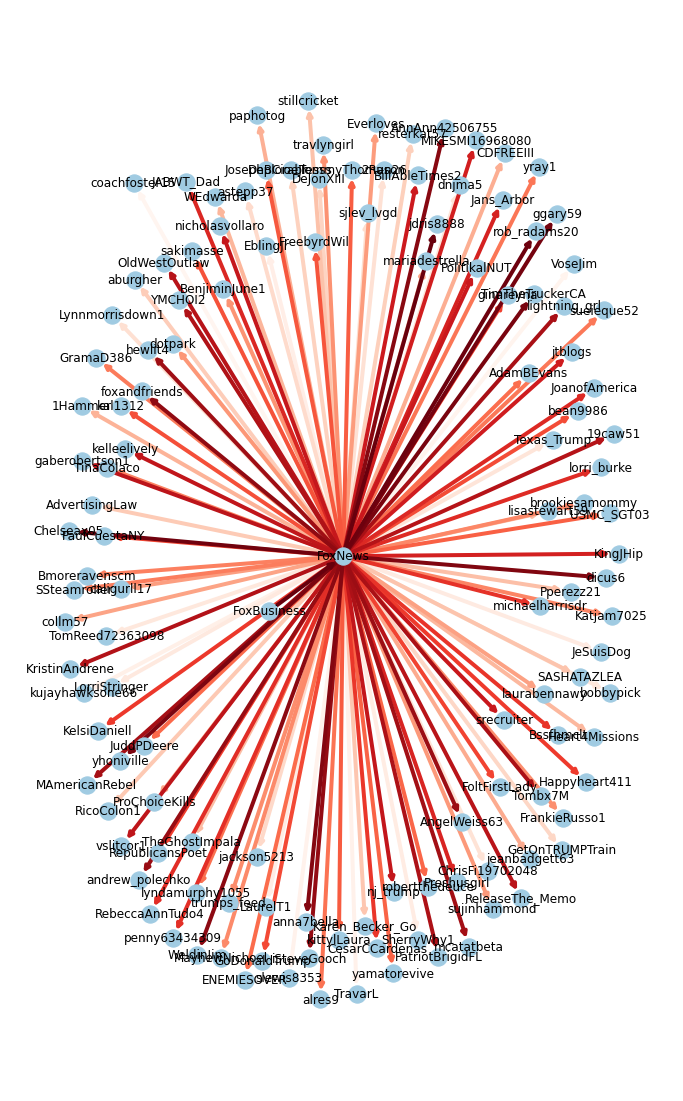

In [ ]:
plt.figure(figsize=(12,20))
pos = nx.spring_layout(G_rt,k=0.20,iterations=20)
colors = range(129)
nx.draw_networkx(G_rt,pos,arrows=True, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=plt.cm.Reds, with_labels=True)
plt.axis('off')
plt.show()

## Part C. Degree centrality

9. Run the code from 5. on the whole dataset and call it G_rt_full. Determine the top five users who were retweeted the most in the whole network as well as the top five users who retweeted other users the most. Use for this the functions nx.in_degree_centrality() and nx.out_degree_centrality().

In [ ]:
G_rt_full = nx.from_pandas_edgelist(sotu_retweets, source = 'retweeted_status-user-screen_name', target = 'user-screen_name', create_using = nx.DiGraph())
top_retweeters = nx.in_degree_centrality(G_rt_full)
top_retweeted = nx.out_degree_centrality(G_rt_full)

print(top_retweeters)
print(top_retweeted)

{'ScottPresler': 0.0, 'MatthewJAld': 0.0004374453193350831, 'RealJack': 0.0, 'broussard_sr': 0.0004374453193350831, 'UNITEDWEDREAM': 0.0, 'CLSTEPHANY': 0.0004374453193350831, 'TomiLahren': 0.0, 'DAWNSTUTESMAN': 0.0004374453193350831, 'SCischk': 0.0004374453193350831, 'glennbeck': 0.0, 'bceil': 0.0004374453193350831, 'PressSec': 0.0, 'JimJestedm': 0.0004374453193350831, 'Fuctupmind': 0.0, 'CaliConsrvative': 0.0004374453193350831, 'SonofLiberty357': 0.0004374453193350831, 'oilaman': 0.0004374453193350831, 'KamVTV': 0.0, 'kimmieguy': 0.0004374453193350831, 'michaelsolakiew': 0.0004374453193350831, 'LizCrokin': 0.0, 'atroussov': 0.0004374453193350831, 'JoyAnnReid': 0.0, 'crose84': 0.0004374453193350831, 'krassenstein': 0.0, 'colaresisle': 0.0008748906386701663, 'TheRickyDavila': 0.0, 'thedreadedaw': 0.0017497812773403325, 'Public_Citizen': 0.0013123359580052493, 'JamesTLockhart': 0.0004374453193350831, 'davidpsdem': 0.0008748906386701663, 'GayRepublicSwag': 0.0, 'laamigable21': 0.000874890

In [ ]:
sorted_retweeters = {k: v for k, v in sorted(top_retweeters.items(), key= lambda item: item[1], reverse=True)}

In [ ]:
import itertools
print(dict(itertools.islice(sorted_retweeters.items(),5)).keys())

dict_keys(['nljac000', 'thedreadedaw', 'debra_bonanno', 'aedaw9i', 'SteveJa39296543'])


In [ ]:
sorted_retweeted = {k: v for k, v in sorted(top_retweeted.items(), key= lambda item: item[1], reverse=True)}
print(dict(itertools.islice(sorted_retweeted.items(),5)).keys())

dict_keys(['FoxNews', 'WhiteHouse', 'ScottPresler', 'TomiLahren', 'KyleKulinski'])


## Part D. Betweenness centrality

10. Determine the top five users with the highest betweenness centrality using nx.betweenness_centrality() and store the result in rt_centrality. What is their role in the network?

In [ ]:
rt_centrality = nx.betweenness_centrality(G_rt_full, normalized=True)
print(rt_centrality)
rt_centrality = {k: v for k, v in sorted(rt_centrality.items(), key= lambda item: item[1], reverse=True)}
#rt_centrality = dict(itertools.islice(rt_centrality.items(),5))
#print(rt_centrality)
print(dict(itertools.islice(rt_centrality.items(),5)))

{'ScottPresler': 0.0, 'MatthewJAld': 0.0, 'RealJack': 0.0, 'broussard_sr': 0.0, 'UNITEDWEDREAM': 0.0, 'CLSTEPHANY': 0.0, 'TomiLahren': 0.0, 'DAWNSTUTESMAN': 0.0, 'SCischk': 0.0, 'glennbeck': 0.0, 'bceil': 0.0, 'PressSec': 0.0, 'JimJestedm': 0.0, 'Fuctupmind': 0.0, 'CaliConsrvative': 1.9144215288187445e-07, 'SonofLiberty357': 1.1486529172912467e-06, 'oilaman': 0.0, 'KamVTV': 0.0, 'kimmieguy': 0.0, 'michaelsolakiew': 0.0, 'LizCrokin': 0.0, 'atroussov': 0.0, 'JoyAnnReid': 0.0, 'crose84': 0.0, 'krassenstein': 0.0, 'colaresisle': 0.0, 'TheRickyDavila': 0.0, 'thedreadedaw': 0.0, 'Public_Citizen': 9.189223338329973e-06, 'JamesTLockhart': 0.0, 'davidpsdem': 0.0, 'GayRepublicSwag': 0.0, 'laamigable21': 0.0, 'Shakestweetz': 0.0, 'likessailboats': 0.0, 'buckpolitics': 0.0, 'WaffleSundays': 0.0, 'WhiteHouse': 0.0, 'DorianSoudjian': 0.0, 'Cernovich': 0.0, 'FightingChase': 0.0, 'BennyHCarroll': 0.0, 'annespo': 0.0, 'jmcconnell522': 0.0, 'StrangeLunaMari': 0.0, 'EARTH3R': 0.0, 'michelleking66': 0.0, 

In [ ]:
rt_centrality.values()

dict_values([2.5653248486171177e-05, 9.189223338329973e-06, 5.16893812781061e-06, 4.594611669164987e-06, 4.020285210519363e-06])

11. Run the following code. What is it doing? Which user is the yellow node? Which user is the biggest node?


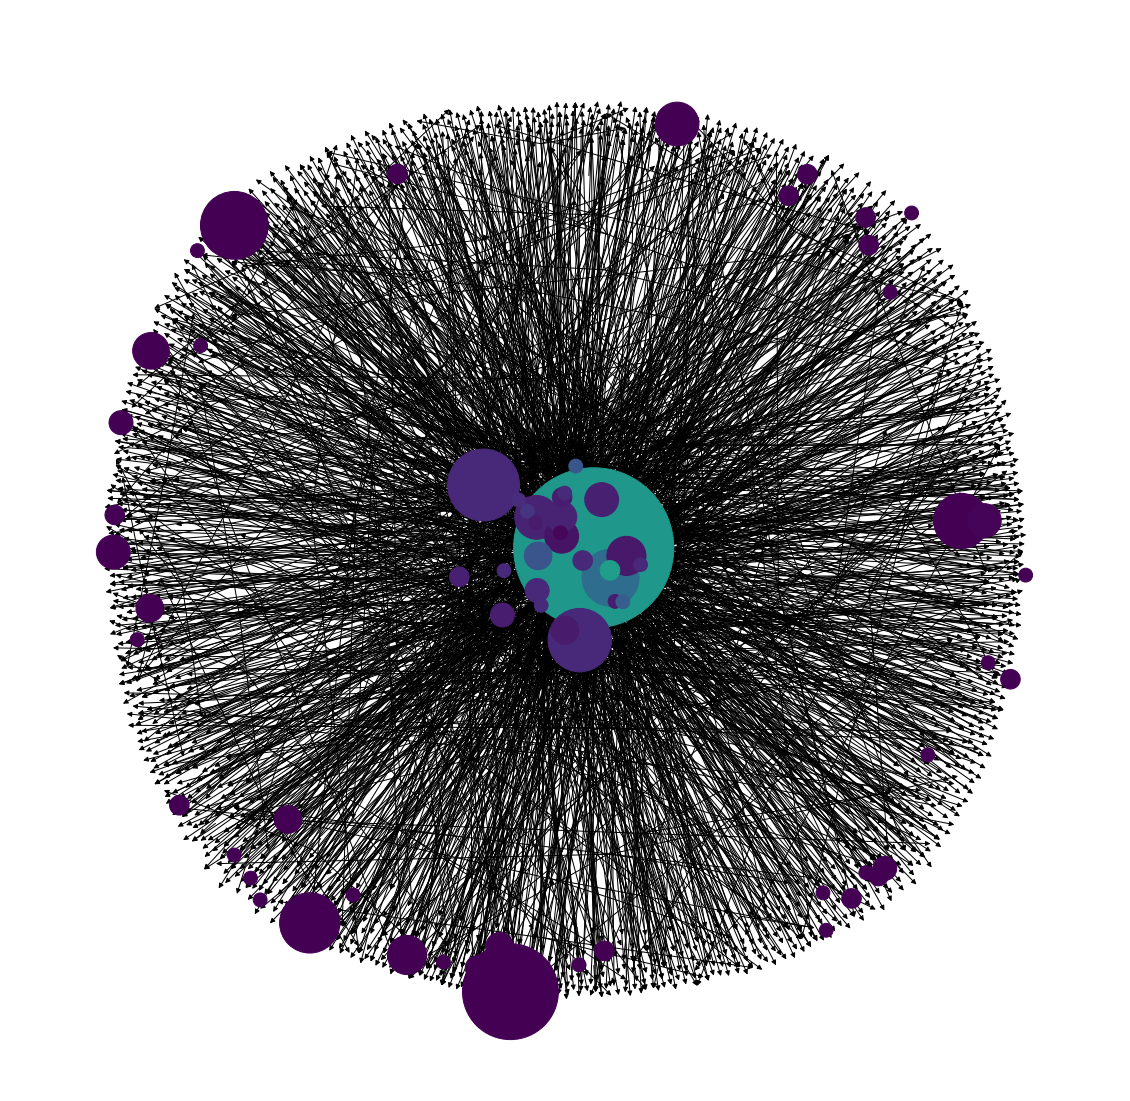

In [ ]:
node_color = [200000000.0 * G_rt_full.out_degree(v) for v in G_rt_full]
node_size = [v * 1000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_rt_full, with_labels=False,node_color=node_color, node_size=node_size )
plt.axis('off')
plt.show()

## Word Cloud!

12. (Optional): Generate a word cloud with the most common words in all Tweets from sotu_retweets_Fox.text. Clean the text before that appropriately and join all Tweets. You can use the following code for the wordcloud:

What are people talking about?

In [ ]:
data = list(sotu_retweets_Fox.text)
data[0]

'RT @FoxNews: .@POTUS: "Terrorists who do things like place bombs in civilian hospitals are evil. When possible, we have no choice but to an…'

In [ ]:
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
data=[strip_numeric(sent) for sent in data]
print(data[0])


RT @FoxNews: .@POTUS: "Terrorists who do things like place bombs in civilian hospitals are evil. When possible, we have no choice but to an…


In [ ]:
# Remove punctuation
data=[strip_punctuation(sent) for sent in data]
# Remove multiple spaces
data=[strip_multiple_whitespaces(sent) for sent in data]
# Transform all data to lower-case
data=[sent.lower() for sent in data]
#print(data[0])
data=[remove_stopwords(sent) for sent in data]
#print(data[0])
data=[strip_short(sent) for sent in data]
print(data[0])

foxnews potus terrorists things like place bombs civilian hospitals evil possible choice an…


In [ ]:
data_st = ''
for t in data:
  data_st += t + ''

In [ ]:
all_stopwords = STOPWORDS
stopw = ''
for w in all_stopwords:
  stopw += w + ' '
print(stopw)

some whereafter that somewhere thence yourself hereby becomes quite unless anyone seems meanwhile who once has hereafter couldnt neither am several those ourselves well through four towards thereby none fifteen anyhow used upon alone toward among serious so go due seem since down herself when again full three else de and below such regarding back thereafter most made they ltd move elsewhere last an no out almost but becoming him thin part though indeed latterly hundred everyone cant sometime because you sometimes eight nothing without another more thereupon twenty might whatever our hers there except from me former take sixty he together around could where over are re being somehow yourselves already eleven call in fire per all own themselves other your to front fill only therein empty noone himself or just name however must nor this something whose afterwards always further anything first by done describe see using between anyway system everything few how beforehand my their via bill 

In [ ]:
other_stop = ['foxnews', 'potus', 'fqtpoyknd', 'https', 'httpsfoxnews', 'http']
for w in other_stop:
  stopw += w + ' '

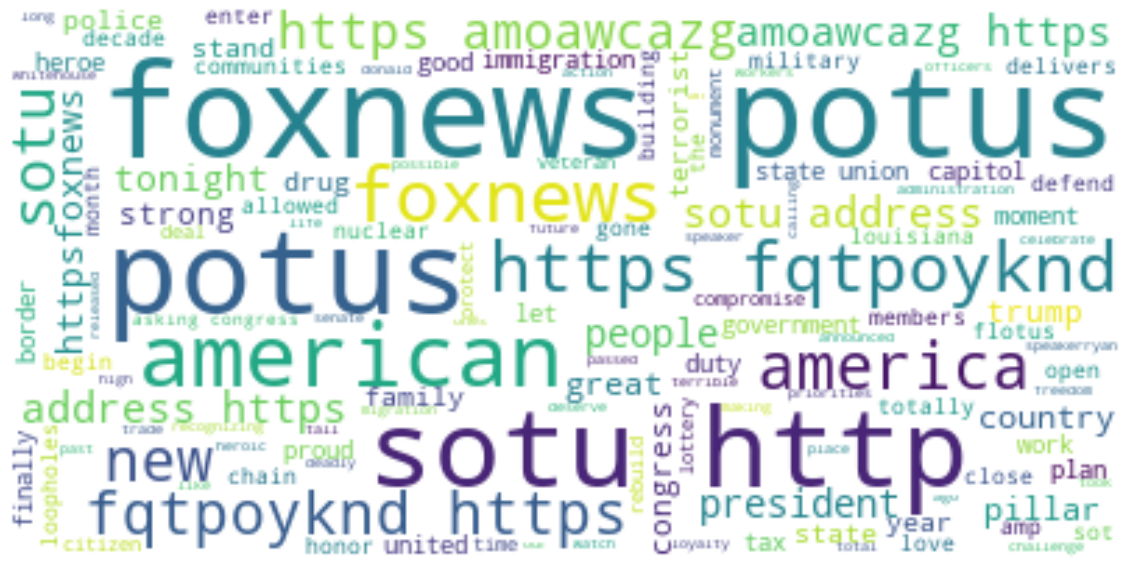

In [ ]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(stopwords=stopw, background_color="white").generate(data_st)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()